In [1]:
# Imports
import pandas as pd

# Data from word bank

In [2]:
# Data raw from the internet

users_link = 'https://api.worldbank.org/v2/en/indicator/IT.NET.USER.ZS?downloadformat=csv'
users_raw_link = pd.read_csv(users_link, skiprows=4, sep=',')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 12: invalid start byte

In [ ]:
# DATA comes from: https://data.worldbank.org/indicator/IT.NET.USER.ZS

# Data raw from local file
users_csv_raw = pd.read_csv('individuals_using_the_Internet_percentage_of_population.csv', skiprows=4)

# Metadata
metadata_raw = pd.read_csv('Metadata_Country_individuals_using_the_Internet_percentage_of_population.csv')

In [ ]:
metadata_raw

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia,NaN


In [ ]:
# Copy of data files to be used
# users_link = users_raw_link.copy()

# Data raw from local file
users_csv = users_csv_raw.copy()
metadata = metadata_raw.copy()


In [ ]:
users_csv[users_csv['Country Name'] == 'Argentina']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
9,Argentina,ARG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.9,64.7,68.043064,70.968981,74.294907,77.7,79.9,85.5,87.148293,NaN


# PROJECT FROM DATACAP

# Data from data camp

In [3]:
internet = pd.read_csv('internet.csv')
broadband = pd.read_csv('broadband.csv')
people = pd.read_csv('people.csv')

In [4]:
people


,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


In [5]:
internet


,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [6]:
broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818


# The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [8]:
# What are the top 5 countries with the highest internet use (by population share)?
top_five = internet.query('Year == 2019')
top_five = top_five.groupby('Entity')['Internet_Usage'].sum()
top_five = top_five.sort_values(ascending=False).head(5)
top_five

Entity
Bahrain                 99.701504
Qatar                   99.652804
Kuwait                  99.542676
United Arab Emirates    99.149998
Denmark                 98.046435
Name: Internet_Usage, dtype: float64

In [9]:
# How many people had internet access in those countries in 2019?
countries_users_2019 = people[people['Entity'].isin(top_five.index)]
countries_users_2019 = countries_users_2019 [(countries_users_2019 ['Year'] == 2019)].sort_values(ascending=False, by ='Users' )
countries_users_2019 = countries_users_2019[['Year', 'Entity', 'Users' ]]
countries_users_2019

,Year,Entity,Users
5986,2019,United Arab Emirates,9133361
1565,2019,Denmark,5682653
3091,2019,Kuwait,4420795
4728,2019,Qatar,2797495
477,2019,Bahrain,1489735


In [10]:
# What are the top 5 countries with the highest internet use for each of the following regions:
new = internet.dropna(axis=0, subset=('Code', ))
new = new.query ('Entity != "World"')

df1 = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php', thousands=None, decimal=',')
may = df1[2]
may.rename (columns= {'ISO-alpha3 Code':'Code'}, inplace = True )

countries = new.merge(may, how = "left")

In [12]:
# Africa eastern and southern
aes = 'Eastern Africa', 'Southern Africa'
aes1 = countries[countries['Region 1'].isin(aes)]
aes1 = aes1.query('Year == 2017')

top_five_aes = aes1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_aes

Entity
Seychelles      58.769811
South Africa    56.167394
Djibouti        55.681409
Mauritius       55.403240
Botswana        41.413795
Name: Internet_Usage, dtype: float64

In [13]:
# Africa west and central
awc = 'Western Africa', 'Central Africa'
awc1 = countries[countries['Region 1'].isin(awc)]
awc1 = awc1.query('Year == 2017')
top_five_awc = awc1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_awc

Entity
Cape Verde       57.162146
Cote d'Ivoire    43.839921
Ghana            37.884153
Senegal          29.643124
Mauritania       20.800964
Name: Internet_Usage, dtype: float64

In [ ]:
# Latin america and caribean
lac = ["Latin America and the Caribbean"]
lac1 = countries[countries['Region 2'].isin(lac)]
lac1 = lac1.query('Year == 2017')
top_five_lac = lac1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_lac

Entity
Aruba             97.170000
Bahamas           85.000000
Chile             82.327487
Barbados          81.760778
Cayman Islands    81.067693
Name: Internet_Usage, dtype: float64

In [14]:
# East asia and pacific
eap1 = countries[(countries['Region 1'] == 'Eastern Asia') | (countries['Continent'] == 'Oceania')]
eap1 = eap1.query('Year == 2017')
top_five_eap = eap1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_eap

Entity
South Korea    95.069422
Japan          91.726547
New Zealand    90.811093
Hong Kong      89.415945
Australia      86.545049
Name: Internet_Usage, dtype: float64

In [15]:
# South Asia
sa = ["Southern Asia"]
sa1 = countries[countries['Region 1'].isin(sa)]
sa1 = sa1.query('Year == 2017')
top_five_sa = sa1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_sa

Entity
Iran         64.043974
Maldives     63.185666
Sri Lanka    34.113348
India        32.000000
Nepal        21.403510
Name: Internet_Usage, dtype: float64

In [16]:
# North america
na = ["North America"]
na1 = countries[countries['Continent'].isin(na)]
na1 = na1.query('Year == 2017')
top_five_na = na1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_na

Entity
Bermuda          98.370000
Aruba            97.170000
Canada           92.701372
United States    87.274889
Bahamas          85.000000
Name: Internet_Usage, dtype: float64

In [17]:
# European union
eu =  'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
eu1 = internet[internet['Entity'].isin(eu)]
eu1 = eu1.query('Year == 2019')
top_five_eu = eu1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_eu

Entity
Denmark        98.046435
Sweden         94.493443
Netherlands    93.288591
Spain          90.718665
Belgium        90.370513
Name: Internet_Usage, dtype: float64

In [18]:
# Top five countriea with highest internet use in eu
eu1 = internet[internet['Entity'].isin(eu)]
eu1 = eu1.query('Year == 2017')
top_five_eu = eu1.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending=False).head(5)
top_five_eu

Entity
Luxembourg     97.362960
Denmark        97.099362
Netherlands    93.197279
Sweden         93.006267
Estonia        88.102457
Name: Internet_Usage, dtype: float64

In [19]:
# viz
seven = internet
region3 = 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'
seven_regions = internet[internet['Entity'].isin(region3)]
seven_regions.Entity.unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'East Asia & Pacific', 'European Union',
       'Latin America & Caribbean', 'North America', 'South Asia'],
      dtype=object)

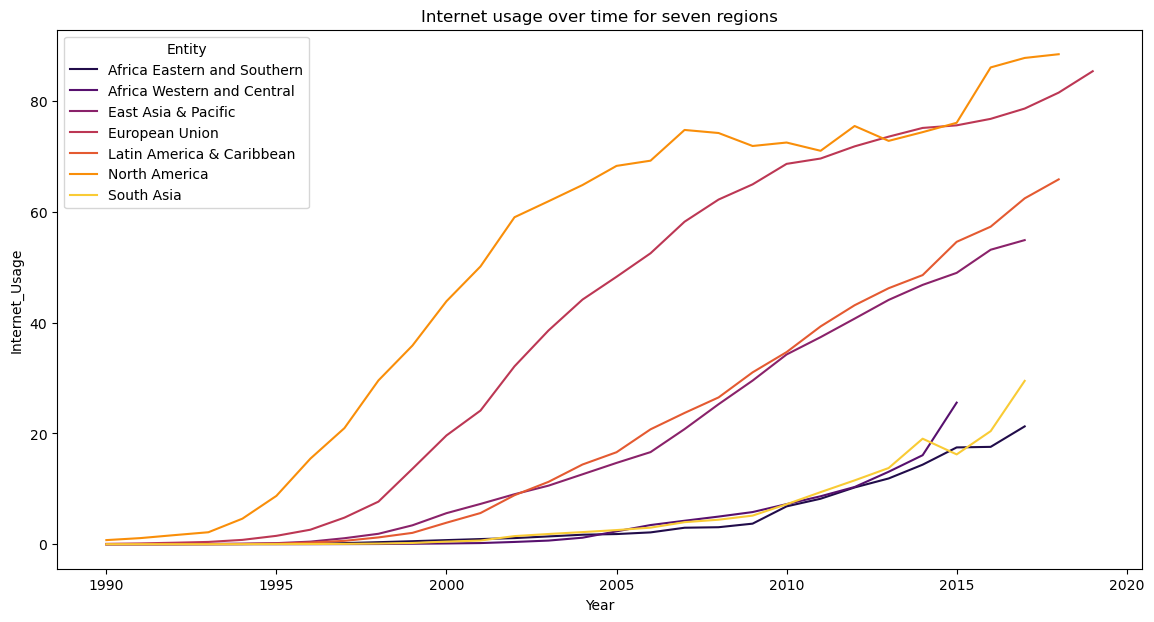

In [20]:
plt.figure(figsize=(14,7))
sns.lineplot(data=seven_regions,  x = 'Year', y = 'Internet_Usage', hue = 'Entity', palette = 'inferno').set(title='Internet usage over time for seven regions');


In [21]:
seven_regions = seven_regions.query ('Year < 2018')
fig = px.bar(seven_regions, x="Entity", y="Internet_Usage", color="Entity", color_discrete_sequence=px.colors.sequential.Inferno,
  animation_frame="Year", animation_group="Entity", title = "Internet usage over time for seven regions from 1990 to 2017 for seven regions")

fig.update_layout(
    margin=dict(l=0, r=0, t=30, b=0))


fig.show()

In [22]:
five = internet
replacers = {'South Asia':'Asia & Pacific','East Asia & Pacific':'Asia & Pacific', 'Africa Eastern and Southern':'Africa','Africa Western and Central':'Africa'} 
five['Entity'] = five['Entity'].replace(replacers)
region = 'Africa', 'Latin America & Caribbean', 'Asia & Pacific', 'North America', 'European Union'
five_regions = five[five['Entity'].isin(region)]

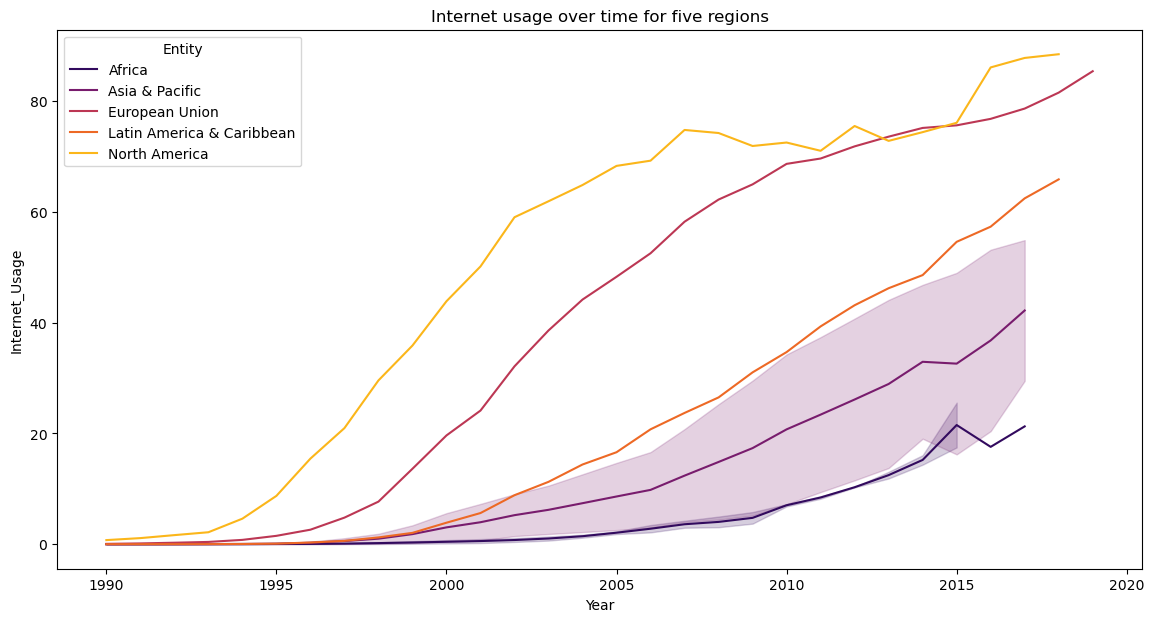

In [23]:
plt.figure(figsize=(14,7))
sns.lineplot(data=five_regions,  x = 'Year', y = 'Internet_Usage', hue = 'Entity', palette = 'inferno').set(title='Internet usage over time for five regions');


In [24]:
five_regions = five_regions.query ('Year < 2018')
fig = px.bar(five_regions, x="Entity", y="Internet_Usage", color="Entity", color_discrete_sequence=px.colors.sequential.Inferno,
  animation_frame="Year", animation_group="Entity", title = "Internet usage over time for five regions from 1990 to 2017")

fig.update_layout(
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

In [25]:
# 5 countries with the most internet users
other = 'World', 'Asia', 'Upper-middle-income countries',  'High-income countries', 'Lower-middle-income countries', 'Europe', 'North America' , 'South America', 'Africa'
no_other = people[~people['Entity'].isin(other)]
no_other = no_other.query ('Year == 2020')
top_five_users = no_other.groupby('Entity')['Users'].sum().sort_values(ascending=False).head(5)
top_five_users

Entity
China            1003218650
India             600446441
United States     305371298
Brazil            173419624
Indonesia         146059763
Name: Users, dtype: int64

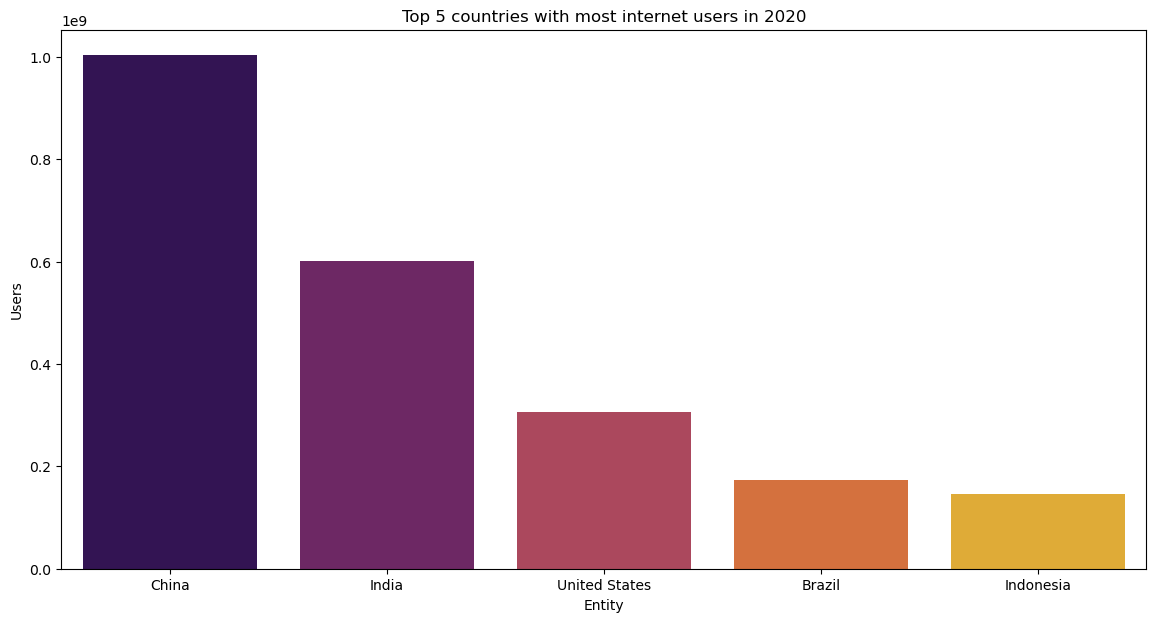

In [26]:
plt.figure(figsize=(14,7))
sns.barplot( x = top_five_users.index, y = top_five_users, palette = "inferno").set(title ="Top 5 countries with most internet users in 2020");


In [27]:
# What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
_data = internet.merge(broadband)
_data = _data.query ('Year == 2019')

col1, col2 = "Internet_Usage", "Broadband_Subscriptions"
corr = _data['Internet_Usage'].corr(_data['Broadband_Subscriptions'])
print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  Internet_Usage  and  Broadband_Subscriptions is:  0.56


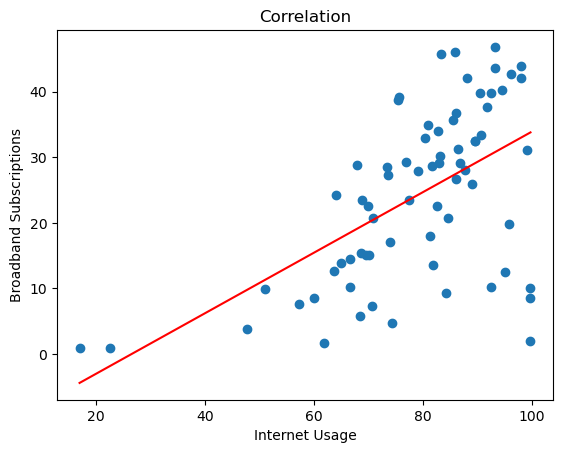

In [28]:
x = _data['Internet_Usage'] 
y = _data['Broadband_Subscriptions']

plt.title('Correlation')

plt.scatter(x, y)


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.xlabel('Internet Usage')
plt.ylabel('Broadband Subscriptions');

In [ ]:
# Correlation 0.56 indicates a moderate positive linear relationship